# **Big Data Processing using PySpark**

# **Task 1: Design and Build Machine Learning methods over largesized data using PySpark**

# **1.Dataset**

**Flight Status Prediction**


The Flight Status Prediction dataset on Kaggle is a collection of flight data that can be used to predict the likelihood of a flight being delayed or cancelled. The dataset contains covering flights 2022.

The dataset includes information on the flight's departure and arrival times, the airline, the origin and destination airports, the scheduled and actual flight times, the distance of the flight, and whether the flight was cancelled or delayed.

The objective of this dataset is to create a Pyspark machine learning model that can precisely forecast the possibility of a flight being delayed or cancelled using this data. This can improve travel planning for both airlines and customers and lessen the negative effects of delays and cancellations.

The dataset is provided in a CSV file format and dataset size 1.42GB, making it a large and complex dataset that requires careful preprocessing.The dataset contian 88669 rows  61 columns





In [ ]:
!pip install pyspark py4j


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=dfc9cb937b3e8ffa310743263896f7055d066f132c2cff58efd628f2c1b66c5b
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
#Connection with spark context
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Big data") \
                            .master("local[*]")\
                            .config("spark.some.config.option", "some-value") \
                            .getOrCreate()


In [ ]:
Data = spark.read.csv('/content/Combined_Flights_2022.csv',header = True,inferSchema=True)

Data.limit(5).toPandas()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [ ]:
Data.show()

+-------------------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|

In [ ]:
# To get the Datatypes of the columns
Data.printSchema()

root
 |-- FlightDate: timestamp (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = tru

In [ ]:
Data.describe()

DataFrame[summary: string, Airline: string, Origin: string, Dest: string, CRSDepTime: string, DepTime: string, DepDelayMinutes: string, DepDelay: string, ArrTime: string, ArrDelayMinutes: string, AirTime: string, CRSElapsedTime: string, ActualElapsedTime: string, Distance: string, Year: string, Quarter: string, Month: string, DayofMonth: string, DayOfWeek: string, Marketing_Airline_Network: string, Operated_or_Branded_Code_Share_Partners: string, DOT_ID_Marketing_Airline: string, IATA_Code_Marketing_Airline: string, Flight_Number_Marketing_Airline: string, Operating_Airline: string, DOT_ID_Operating_Airline: string, IATA_Code_Operating_Airline: string, Tail_Number: string, Flight_Number_Operating_Airline: string, OriginAirportID: string, OriginAirportSeqID: string, OriginCityMarketID: string, OriginCityName: string, OriginState: string, OriginStateFips: string, OriginStateName: string, OriginWac: string, DestAirportID: string, DestAirportSeqID: string, DestCityMarketID: string, DestCit

In [ ]:
df1=Data.toPandas()

In [ ]:
#find the Null values
df1.isnull().sum()

FlightDate               0
Airline                  0
Origin                   0
Dest                     0
Cancelled                0
                      ... 
ArrDel15              2063
ArrivalDelayGroups    2063
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 61, dtype: int64

In [ ]:
df1.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,88669.000000,86829.000000,86829.000000,86829.000000,86770.000000,86606.000000,86606.000000,88669.000000,86606.000000,88669.000000,...,86804.000000,86804.000000,86770.000000,86770.000000,88669.000000,86606.000000,86606.000000,86606.000000,88669.000000,88669.000000
mean,1325.837824,1342.642101,18.600318,17.407007,1421.077146,16.767453,100.283306,124.868139,118.848902,717.950061,...,12.593233,1360.476337,1420.516469,5.982367,1452.096076,11.447717,0.293224,0.268550,3.359596,0.002616
std,502.033464,522.906373,34.876374,35.571877,577.477011,34.809771,56.075504,56.609797,57.416297,463.920406,...,6.908731,523.454038,573.191345,5.951460,546.811301,37.985739,0.455243,2.332586,1.858706,0.076830
min,500.000000,1.000000,0.000000,-25.000000,1.000000,0.000000,13.000000,35.000000,25.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,-55.000000,0.000000,-2.000000,1.000000,0.000000
25%,900.000000,903.000000,0.000000,-2.000000,1011.000000,0.000000,59.000000,80.000000,76.000000,369.000000,...,9.000000,914.000000,1009.000000,3.000000,1030.000000,-10.000000,0.000000,-1.000000,2.000000,0.000000
50%,1320.000000,1329.000000,5.000000,5.000000,1440.000000,0.000000,87.000000,115.000000,106.000000,616.000000,...,11.000000,1340.000000,1438.000000,5.000000,1455.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,1745.000000,1804.000000,23.000000,23.000000,1913.000000,19.000000,127.000000,150.000000,146.000000,937.000000,...,14.000000,1816.000000,1911.000000,6.000000,1915.000000,19.000000,1.000000,1.000000,4.000000,0.000000
max,2255.000000,2400.000000,659.000000,659.000000,2400.000000,697.000000,407.000000,425.000000,474.000000,2979.000000,...,168.000000,2400.000000,2400.000000,186.000000,2355.000000,697.000000,1.000000,12.000000,11.000000,9.000000


In [ ]:
#Numbers of rows and columns in the Dataset
df1.shape

(88669, 61)

In [ ]:
#All the information about the dataset 
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88669 entries, 0 to 88668
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   FlightDate                               88669 non-null  datetime64[ns]
 1   Airline                                  88669 non-null  object        
 2   Origin                                   88669 non-null  object        
 3   Dest                                     88669 non-null  object        
 4   Cancelled                                88669 non-null  bool          
 5   Diverted                                 88669 non-null  bool          
 6   CRSDepTime                               88669 non-null  int32         
 7   DepTime                                  86829 non-null  float64       
 8   DepDelayMinutes                          86829 non-null  float64       
 9   DepDelay                               

In [ ]:
df1['ArrDel15'].dropna()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88664    0.0
88665    1.0
88666    0.0
88667    1.0
88668    0.0
Name: ArrDel15, Length: 86606, dtype: float64

In [ ]:
#Drop the NUll Values. 
df1.dropna()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88664,2022-04-09,Southwest Airlines Co.,MCO,PVD,False,False,630,635.0,5.0,5.0,...,659.0,903.0,5.0,910,-2.0,0.0,-1.0,0900-0959,5,0
88665,2022-04-09,Southwest Airlines Co.,MCO,PVD,False,False,1650,1712.0,22.0,22.0,...,1739.0,1948.0,4.0,1930,22.0,1.0,1.0,1900-1959,5,0
88666,2022-04-09,Southwest Airlines Co.,MCO,RDU,False,False,905,901.0,0.0,-4.0,...,915.0,1028.0,3.0,1050,-19.0,0.0,-2.0,1000-1059,3,0
88667,2022-04-09,Southwest Airlines Co.,MCO,RDU,False,False,1710,1717.0,7.0,7.0,...,1747.0,1910.0,2.0,1850,22.0,1.0,1.0,1800-1859,3,0


In [ ]:
#Change the type
Dataset=df1
Dataset['Cancelled']=Dataset['Cancelled'].astype('float')
Dataset.head(5)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,0.0,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,0.0,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,0.0,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,0.0,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,0.0,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [ ]:
Dataset['Diverted']=Dataset['Diverted'].astype('float')
Dataset.head(5)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,0.0,0.0,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,0.0,0.0,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,0.0,0.0,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,0.0,0.0,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,0.0,0.0,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


# **Create a Spark Context**

In [ ]:
from pyspark.context import SparkContext

In [ ]:
sc=SparkContext.getOrCreate() 

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)


/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# **Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoder transform Non Numerical Label into Numeric Label
le=LabelEncoder()

In [ ]:
final_data=Dataset.drop(columns=['DepDelayMinutes','AirTime','CRSElapsedTime'],axis=1)
final_data=Dataset.drop(columns=['ActualElapsedTime','Quarter','DayofMonth','DayOfWeek'],axis=1)
final_data=Dataset.drop(columns=['Marketing_Airline_Network','Operated_or_Branded_Code_Share_Partners','DOT_ID_Marketing_Airline'],axis=1) 
final_data=Dataset.drop(columns=['Operating_Airline','DOT_ID_Operating_Airline','IATA_Code_Operating_Airline','Tail_Number','Flight_Number_Operating_Airline','OriginAirportID','OriginAirportSeqID','OriginCityMarketID','OriginCityName','OriginState','OriginStateFips','OriginStateName','OriginWac','DestAirportID','DestAirportSeqID','DestCityMarketID','DestCityName','DestState','DestStateFips','DestStateName','DestWac','DepDel15','DepartureDelayGroups','DepTimeBlk','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrDelay','ArrDel15','ArrivalDelayGroups','ArrTimeBlk','DistanceGroup','DivAirportLandings'])


In [ ]:
final_data['Cancelled']=final_data['Cancelled'].astype('float64')
final_data['Cancelled']=final_data['Cancelled'].astype('int')


In [ ]:
final_data['Diverted']=final_data['Diverted'].astype('float64')
final_data['Diverted']=final_data['Diverted'].astype('int')


In [ ]:
#After Preprocessing the final Dataset 
final_data

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,0,0,1133,1123.0,0.0,-10.0,...,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,0,0,732,728.0,0.0,-4.0,...,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,0,0,1529,1514.0,0.0,-15.0,...,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4298
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,0,0,1435,1430.0,0.0,-5.0,...,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4296
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,0,0,1135,1135.0,0.0,0.0,...,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88664,2022-04-09,Southwest Airlines Co.,MCO,PVD,0,0,630,635.0,5.0,5.0,...,2022,2,4,9,6,WN,WN,19393,WN,1334
88665,2022-04-09,Southwest Airlines Co.,MCO,PVD,0,0,1650,1712.0,22.0,22.0,...,2022,2,4,9,6,WN,WN,19393,WN,3589
88666,2022-04-09,Southwest Airlines Co.,MCO,RDU,0,0,905,901.0,0.0,-4.0,...,2022,2,4,9,6,WN,WN,19393,WN,3293
88667,2022-04-09,Southwest Airlines Co.,MCO,RDU,0,0,1710,1717.0,7.0,7.0,...,2022,2,4,9,6,WN,WN,19393,WN,3955


In [ ]:
final_data_Transform=final_data.apply(le.fit_transform)


In [ ]:
final_data_Transform

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline
0,3,1,54,38,0,0,159,496,0,10,...,0,0,0,3,0,0,0,1,0,4008
1,3,1,64,67,0,0,50,261,0,16,...,0,0,0,3,0,0,0,1,0,4006
2,3,1,41,38,0,0,272,727,0,5,...,0,0,0,3,0,0,0,1,0,4005
3,3,1,67,55,0,0,249,683,0,15,...,0,0,0,3,0,0,0,1,0,4003
4,3,1,41,38,0,0,160,508,0,20,...,0,0,0,3,0,0,0,1,0,4002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88664,8,4,93,124,0,0,23,208,5,25,...,0,0,0,8,5,1,1,0,1,1144
88665,8,4,93,124,0,0,313,845,22,42,...,0,0,0,8,5,1,1,0,1,3325
88666,8,4,93,126,0,0,88,354,0,16,...,0,0,0,8,5,1,1,0,1,3036
88667,8,4,93,126,0,0,323,850,7,27,...,0,0,0,8,5,1,1,0,1,3689


In [ ]:
# THE REASON WHY i AM CONVERTING INTO this DATAFRAME  BECAUSE PYSPARK ML DOES NOT WORK WITH PANDAS DATAFRAME.
spark_dff = sqlContext.createDataFrame(final_data_Transform)
spark_dff.show(5)

+----------+-------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+
|FlightDate|Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinutes|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Year|Quarter|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|DOT_ID_Marketing_Airline|IATA_Code_Marketing_Airline|Flight_Number_Marketing_Airline|
+----------+-------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+---

In [ ]:
#IT IS COMPULSORY TO CONVERT YOUR DATAFRAME INTO DENSE VECTOR. WITHOUT CONVERTING INTO DENSE VECTOR ALGORITHM WILL NOT WORK.
# DENSE VECTOR JUST CONVERT THAT COLUMNS INTO POINTS. THAT'S ALL
from pyspark.ml.feature import VectorAssembler

In [ ]:
required_features=['FlightDate','Airline','Origin','Dest','Cancelled','Diverted','CRSDepTime','DepTime','DepDelayMinutes','DepDelay','ArrTime','ArrDelayMinutes','AirTime','CRSElapsedTime','ActualElapsedTime','Distance','Year','Quarter','Month','DayofMonth','DayOfWeek','Marketing_Airline_Network','Operated_or_Branded_Code_Share_Partners','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline','Flight_Number_Marketing_Airline']

In [ ]:
assembler = VectorAssembler(inputCols=required_features, outputCol='features')


In [ ]:
transformed_data = assembler.transform(spark_dff)


In [ ]:
transformed_data.show(5)
  

+----------+-------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+--------------------+
|FlightDate|Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinutes|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Year|Quarter|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|DOT_ID_Marketing_Airline|IATA_Code_Marketing_Airline|Flight_Number_Marketing_Airline|            features|
+----------+-------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+-

In [ ]:
#Split Train and test Data into 70/30
(training_data, test_data) = transformed_data.randomSplit([0.7,0.3])


In [ ]:
transformed_data.count()

print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 62056
Test Dataset Count: 26613


# **Apply one clustering method K-means**

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
cluster_count = [10,30,50,70,90]
for i in cluster_count:
 kmeans = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")
 kmeansModel = kmeans.fit(training_data)
 for clusters in kmeansModel.clusterCenters():
   print(clusters)
 # test the model with test data set
 predictDf = kmeansModel.transform(test_data)
 predictDf.show(3)
 evaluator = ClusteringEvaluator()
 silhouette = evaluator.evaluate(predictDf)
 print("Silhouette with squared euclidean distance = " + str(silhouette))

[1.31566107e+01 4.00000000e+00 8.04859654e+01 8.24004460e+01
 4.40713536e-02 2.62329486e-03 3.16535152e+02 8.82156217e+02
 3.94533054e+01 5.87707240e+01 1.09521944e+03 3.81665792e+01
 1.00360310e+02 7.20478751e+01 1.06221800e+02 2.83768888e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31566107e+01
 3.12355719e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+00 2.22718888e+03]
[1.11816347e+01 3.43920283e+00 7.92214934e+01 7.98289606e+01
 1.89202825e-02 2.52270434e-03 1.86194248e+02 5.80721746e+02
 2.35658426e+01 4.18085267e+01 7.48685671e+02 2.34306256e+01
 9.17875883e+01 7.48224016e+01 9.95088295e+01 2.80653128e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11816347e+01
 3.59914228e+00 7.95156408e-01 7.95156408e-01 2.04843592e-01
 7.95156408e-01 4.09689632e+03]
[1.34842266e+01 4.00000000e+00 6.90539463e+01 7.48824909e+01
 0.00000000e+00 1.40729448e-03 8.13144130e+01 3.29803213e+02
 8.91286502e+00 2.72449865e+01 5.37669286e+02 8.45056878e+00
 8.58885892e+01 7.442

In [ ]:
predictDf.groupBy("prediction").count().show()


+----------+-----+
|prediction|count|
+----------+-----+
|        31|  440|
|        85|  269|
|        65|  545|
|        53|  442|
|        78|  137|
|        34|  192|
|        81|  356|
|        28|  149|
|        76|  188|
|        27|  322|
|        26|  121|
|        44|  132|
|        12|  395|
|        22|  318|
|        47|  333|
|         1|  112|
|        52|  220|
|        13|  180|
|        16|  405|
|        86|  109|
+----------+-----+
only showing top 20 rows



# **Apply one multi classifier incorporating Ensemble techniques and explain its configurations and parameters**

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
  

In [ ]:
rc=RandomForestRegressor(featuresCol='features',labelCol='DepTime',maxDepth=5)


In [ ]:
r_model=rc.fit(training_data)

In [ ]:
pre=r_model.transform(test_data)

In [ ]:
pre.select('prediction','DepTime').show(10)


+------------------+-------+
|        prediction|DepTime|
+------------------+-------+
| 734.9719249124005|    709|
| 886.8825690913147|    897|
|  311.490819708849|    316|
|227.14339967792617|    212|
| 597.0339934303618|    584|
|471.92950894763965|    500|
|429.89263726650427|    435|
| 860.5392800019603|    874|
| 593.1694826613723|    599|
| 633.1224926960374|    647|
+------------------+-------+
only showing top 10 rows



# **Measure the performance of both methods. Visualize your results and findings using Python libraries**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pltd
final_data.groupby('Airline', as_index=False)['Cancelled'].count()


,Airline,Cancelled
0,Air Wisconsin Airlines Corp,777
1,"Commutair Aka Champlain Enterprises, Inc.",647
2,"GoJet Airlines, LLC d/b/a United Express",395
3,Mesa Airlines Inc.,2
4,Southwest Airlines Co.,86848


<Axes: xlabel='Cancelled', ylabel='Count'>

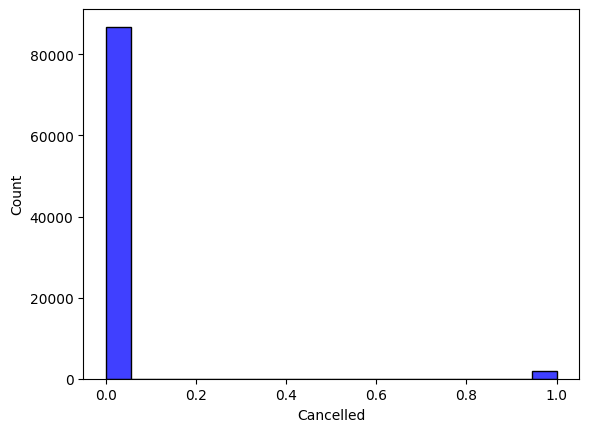

In [ ]:
sns.histplot(data=final_data['Cancelled'],color='blue')

<Axes: >

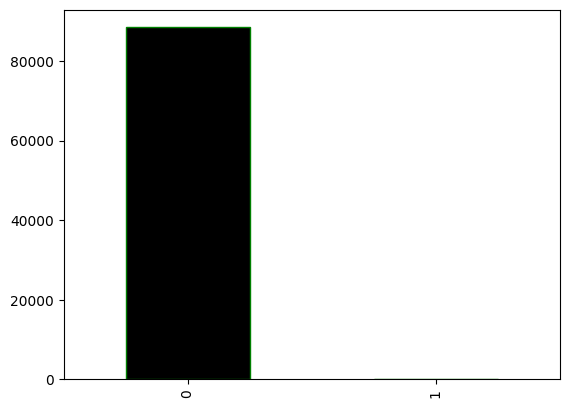

In [63]:
#COUNT THE Diverted
final_data['Diverted'].value_counts().plot(kind='bar',edgecolor='green',color='black')

<Axes: >

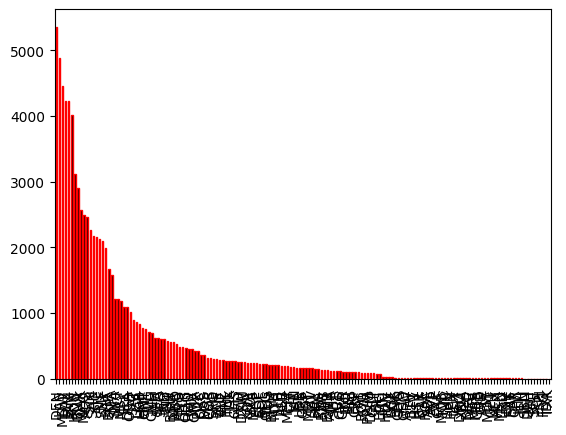

In [68]:
# COUNT THE destination
final_data['Dest'].value_counts().plot(kind='bar',edgecolor='red',color='black')

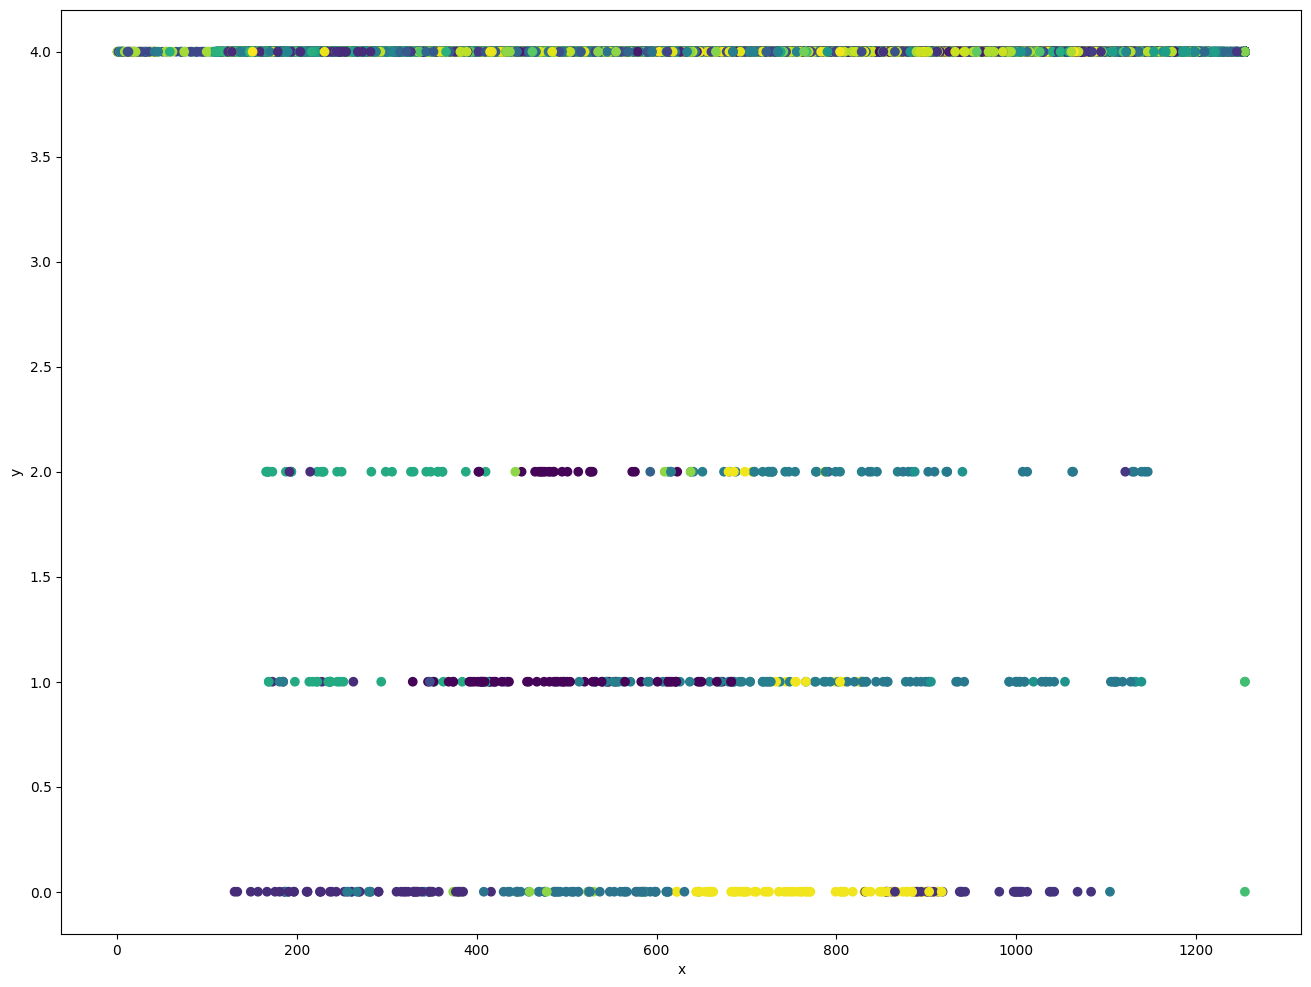

<Figure size 1200x1000 with 0 Axes>

In [71]:
pddf_pred = predictDf.toPandas()
import matplotlib.pyplot as plt
pddf_pred = predictDf.toPandas()
pddf_pred.head()
fig = plt.figure(figsize=(16,12))
KmVis= fig.add_subplot(111)
threedee = plt.figure(figsize=(12,10))
KmVis.scatter(pddf_pred.DepTime, pddf_pred.Airline, c=pddf_pred.prediction)
KmVis.set_xlabel('x')
KmVis.set_ylabel('y')
plt.show()



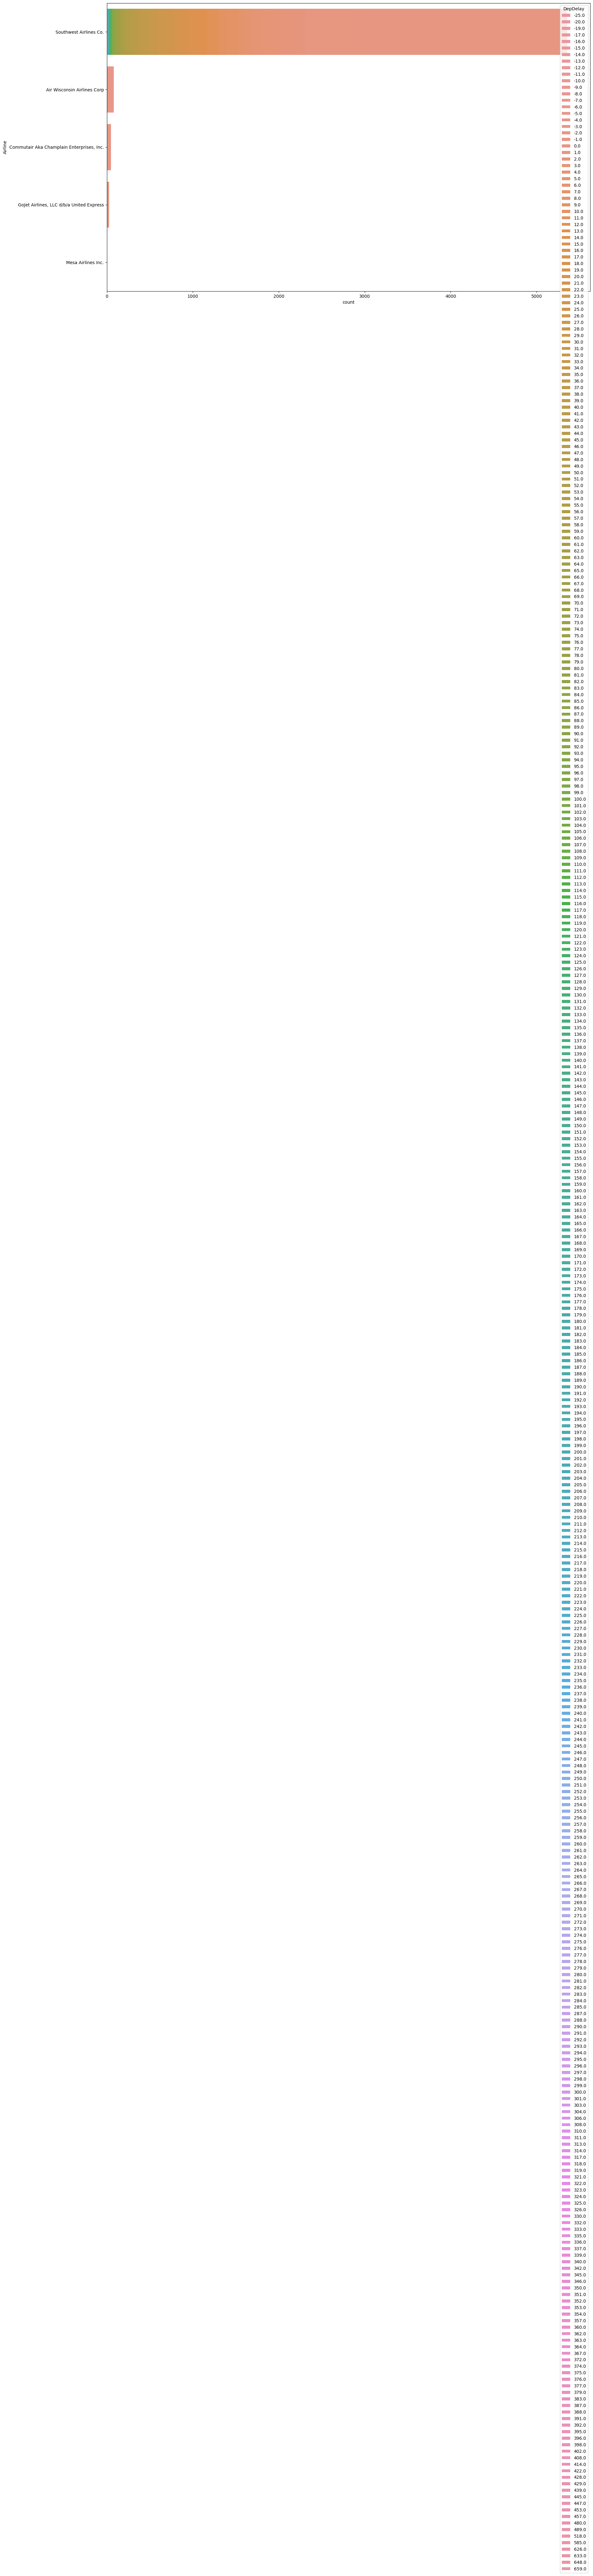

In [75]:
#Delay categories per Airline
plt.figure(figsize=(20,12))
airline_order = final_data['Airline'].value_counts().index.tolist()
sns.countplot(data=final_data, y='Airline', order=airline_order, hue='DepDelay', dodge=False)
plt.show()

Text(0.5, 0.98, 'Delay Groups')

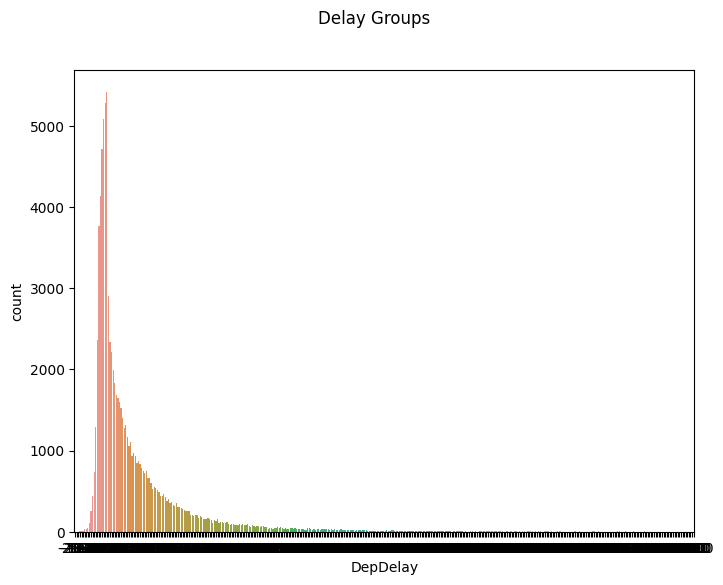

In [76]:
plt.figure(figsize=(8,6))
sns.countplot(data=final_data, x='DepDelay')
plt.suptitle('Delay Groups')

<Axes: >

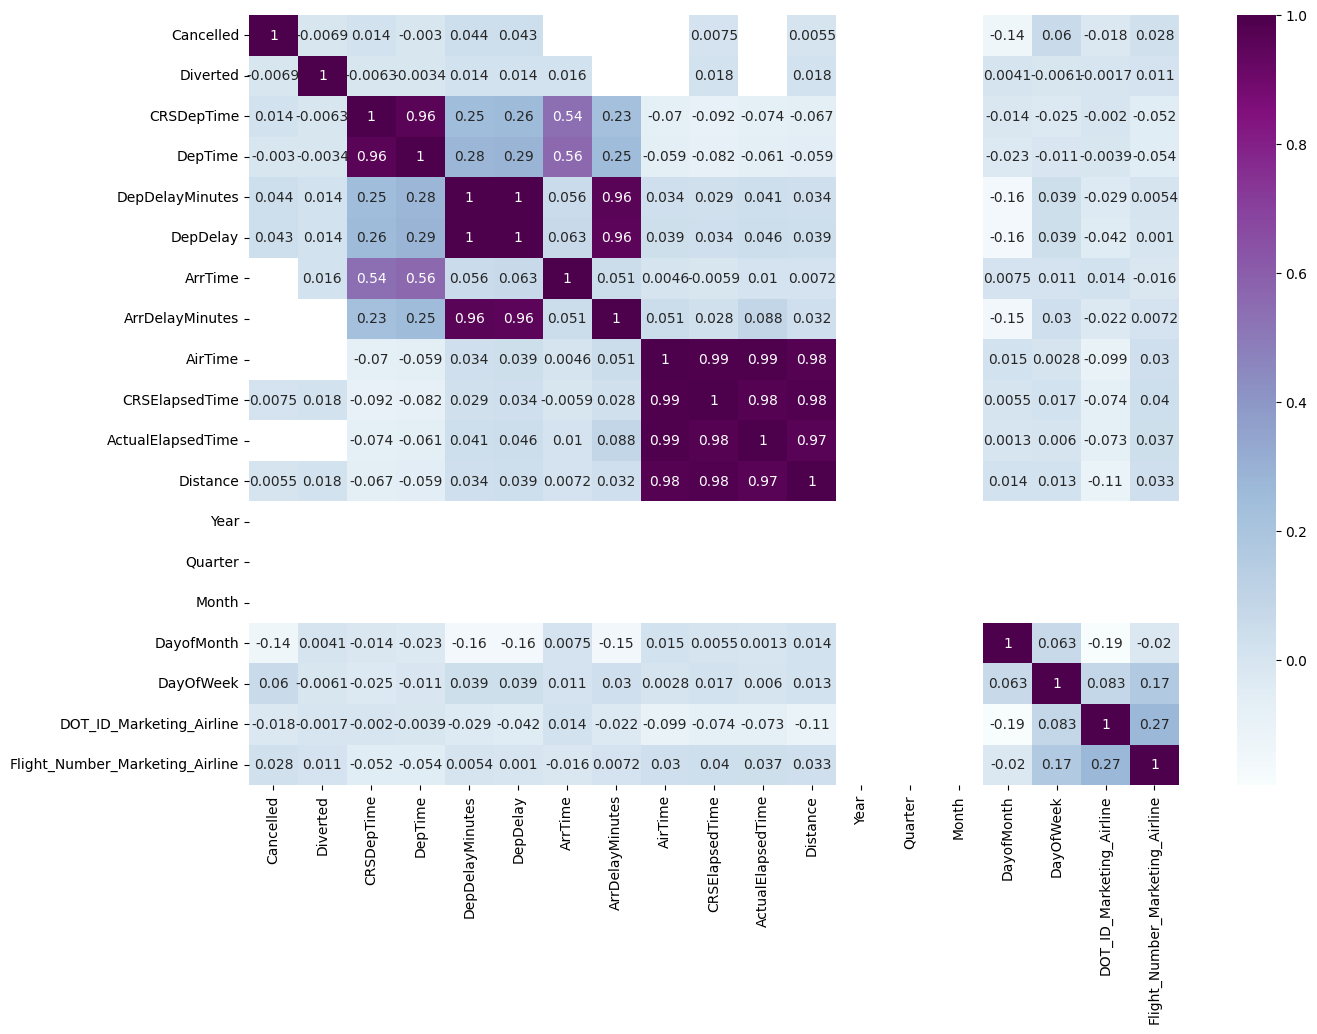

In [81]:
#Coorelation Matrix
corr = final_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

<Axes: xlabel='AirTime', ylabel='count'>

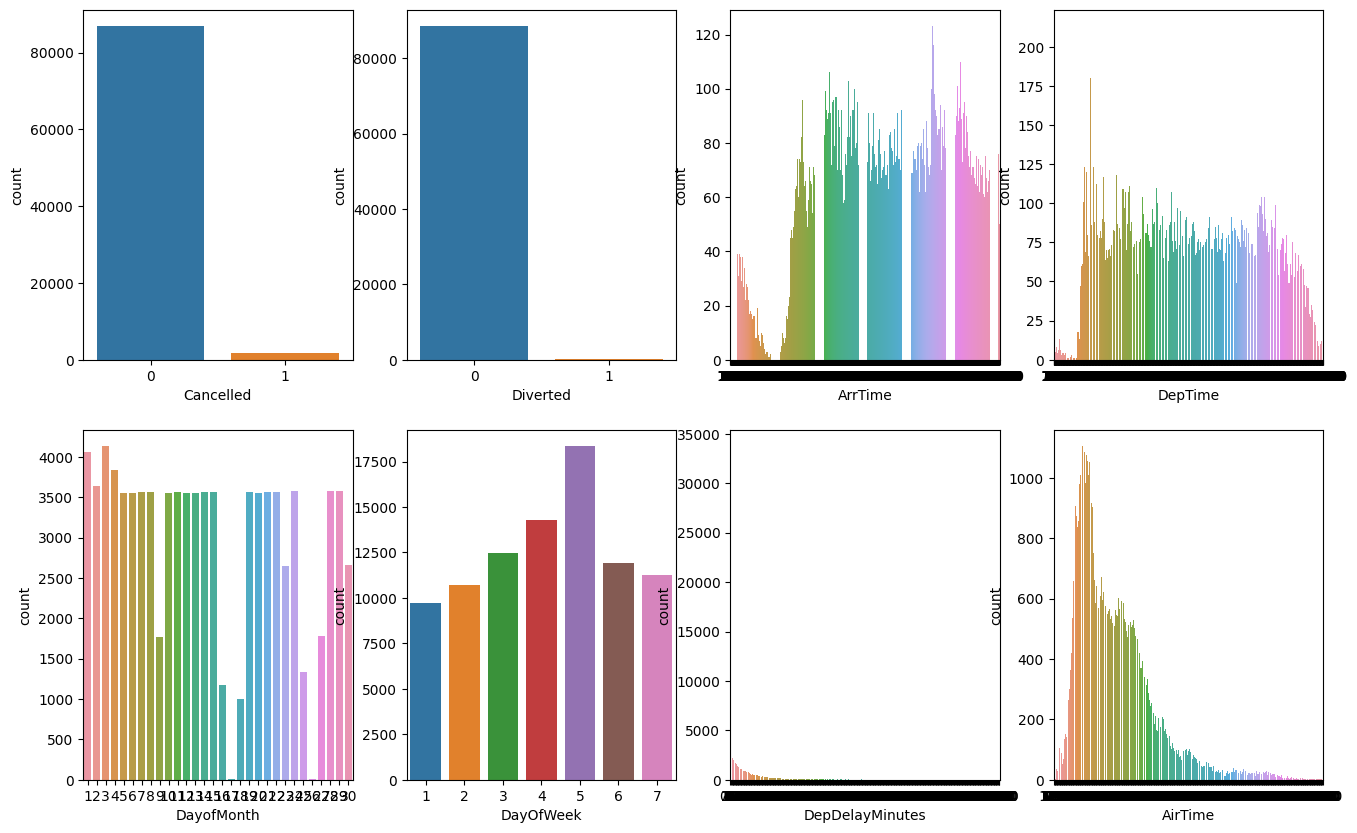

In [86]:
# Univariate Analysis:
# categorical attributes visualization
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Cancelled', data = final_data, ax=ax[0][0])
sns.countplot(x='Diverted', data = final_data, ax=ax[0][1])
sns.countplot(x='ArrTime', data = final_data, ax=ax[0][2])
sns.countplot(x='DepTime', data = final_data, ax=ax[0][3])
sns.countplot(x='DayofMonth', data = final_data, ax=ax[1][0])
sns.countplot(x='DayOfWeek', data = final_data, ax=ax[1][1])
sns.countplot(x='DepDelayMinutes', data = final_data, ax=ax[1][2])
sns.countplot(x='AirTime', data = final_data, ax=ax[1][3])

# **Task 2: A Real Time Streaming Application**

After conducting research, I found a real-time streaming application called **"Youtube"**

**Short overview of the streaming application**

Live streaming options are available on the well-known video-sharing website YouTube. A global audience may watch live sporting events, concerts, and other types of material thanks to YouTube's live streaming service. Many Other issues, such as worries about copyright infringement, false information, and unsuitable content, have been raised in the past regarding YouTube. The platform has taken action to deal with these problems, including cooperating with fact-checkers to combat disinformation and putting in place a Content ID system to identify and delete copyrighted content.

**Application functionality**

Creators can broadcast live video material in real-time using YouTube's live streaming feature. The technology leverages Real-Time Messaging Protocol (RTMP) for live broadcasting, allowing for low-latency streaming with an end-to-end latency of about 10–20 seconds. Ultra-low latency is a low-latency streaming mode that YouTube also provides; it can cut end-to-end latency to as little as 2 seconds. Micro-batching and adaptive bitrate streaming are two components of the low latency processing methodology that YouTube uses.

Then, break down this streaming application into the following layers:

**a. Data source layer**

Cameras, microphones, and other recording equipment that captures the live event are among the data sources used by YouTube. For more sophisticated data source possibilities, YouTube now integrates with third-party programmes like OBS Studio and Streamlabs OBS.

**Streaming layer:**

For live broadcasting, YouTube employs its own specialised streaming protocol called YouTube Live Streaming. The RTMP and HTTP Live Streaming (HLS) protocols are also supported by the platform.

**Streaming processing:**

For the purpose of processing streaming data, YouTube combines open-source programmes like FFMPEG and NGINX. In order to manage and scale its infrastructure, it also makes use of Google Cloud Platform (GCP).

**Presentation layer:**

A real-time dashboard provided by YouTube shows the streamer analytics such as chat messages, viewing numbers, and more. Additionally, the platform provides ways to make money, like Super Chat, Sponsorships, and integration with Google Analytics for more sophisticated presenting options.